In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torchvision
from torchvision.transforms import ToTensor, Normalize, Compose

In [2]:
from scripts.architecture import MLP
from scripts.train import *
from scripts.plot_utils import plot_loss_accuracy, plotValAccuracy

In [3]:
print(torch.__version__)
print(np.__version__)

1.9.0
1.20.3


## Create Parity Data Iterator

In [4]:
transforms = Compose([
    ToTensor(),
    Normalize((0.1307,), (0.3081,))
])

In [5]:
# doesn't perform and transformation until we call the loader
trainset = torchvision.datasets.MNIST(root='data', train=True, download=True, transform=transforms)
testset = torchvision.datasets.MNIST(root='data', train=False, download=True, transform=transforms)

/home/john/anaconda3/lib/python3.8/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /opt/conda/conda-bld/pytorch_1623448234945/work/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [6]:
learn_rate = 0.05
num_epochs = 20
batch_size = 128
loss_fn = torch.nn.CrossEntropyLoss()

### For k = 1

In [7]:
k=1
model = MLP(k, "ReLU")
optimizer = torch.optim.Adadelta(model.parameters(), lr=learn_rate, weight_decay = 0.001)

trainLostList, trainAccList, valLossList, valAccList  = train_model(model, k, trainset, testset, loss_fn, optimizer, num_epochs, batch_size, validate_model = True,
                                                                     performance=accuracy, device="cuda:0", lr_scheduler=None)


Training on cuda:0
Epoch 1 completed. Loss - total: 14115.4622 - average: 0.2353; Performance: 0.9126
TESTING - loss 1478.3215075731277 - performance 0.9476
Epoch 2 completed. Loss - total: 7180.4365 - average: 0.1197; Performance: 0.9600
TESTING - loss 1009.2211812734604 - performance 0.9671
Epoch 3 completed. Loss - total: 5433.3921 - average: 0.0906; Performance: 0.9701
TESTING - loss 811.8188083171844 - performance 0.9723
Epoch 4 completed. Loss - total: 4521.2442 - average: 0.0754; Performance: 0.9750
TESTING - loss 702.5399096310139 - performance 0.9758
Epoch 5 completed. Loss - total: 3923.4382 - average: 0.0654; Performance: 0.9782
TESTING - loss 633.1767849624157 - performance 0.9787
Epoch 6 completed. Loss - total: 3486.5933 - average: 0.0581; Performance: 0.9809
TESTING - loss 584.1693766415119 - performance 0.9806
Epoch 7 completed. Loss - total: 3145.1733 - average: 0.0524; Performance: 0.9831
TESTING - loss 547.6027019321918 - performance 0.9817
Epoch 8 completed. Loss - 

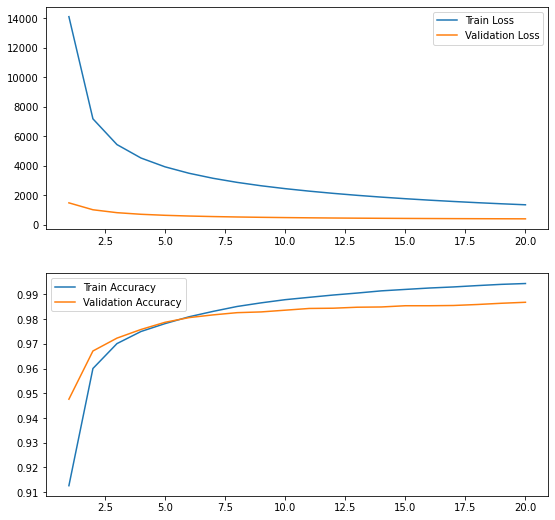

In [8]:
plot_loss_accuracy(trainLostList,valLossList,trainAccList,valAccList,num_epochs)

In [9]:
k=1
model2 = MLP(k, "ReLU")
optimizer = torch.optim.SGD(model2.parameters(), lr=learn_rate)

trainLostList, trainAccList, valLossList, valAccList  = train_model(model2, k, trainset, testset, loss_fn, optimizer, num_epochs, batch_size, validate_model = True,
                                                                     performance=accuracy, device="cuda:0",lr = learn_rate, lr_scheduler=None, updateWManually=True)


Training on cuda:0
Epoch 1 completed. Loss - total: 10338.4122 - average: 0.1723; Performance: 0.9352
TESTING - loss 1008.8872350752354 - performance 0.9624
Epoch 2 completed. Loss - total: 4887.3809 - average: 0.0815; Performance: 0.9727
TESTING - loss 717.690572142601 - performance 0.9753
Epoch 3 completed. Loss - total: 3698.3823 - average: 0.0616; Performance: 0.9794
TESTING - loss 604.5985296368599 - performance 0.9796
Epoch 4 completed. Loss - total: 3039.3671 - average: 0.0507; Performance: 0.9832
TESTING - loss 541.8695714324713 - performance 0.9812
Epoch 5 completed. Loss - total: 2581.2132 - average: 0.0430; Performance: 0.9859
TESTING - loss 501.56309828162193 - performance 0.9826
Epoch 6 completed. Loss - total: 2228.3093 - average: 0.0371; Performance: 0.9882
TESTING - loss 473.2107874006033 - performance 0.9836
Epoch 7 completed. Loss - total: 1942.1782 - average: 0.0324; Performance: 0.9901
TESTING - loss 454.8507481813431 - performance 0.9847
Epoch 8 completed. Loss - t

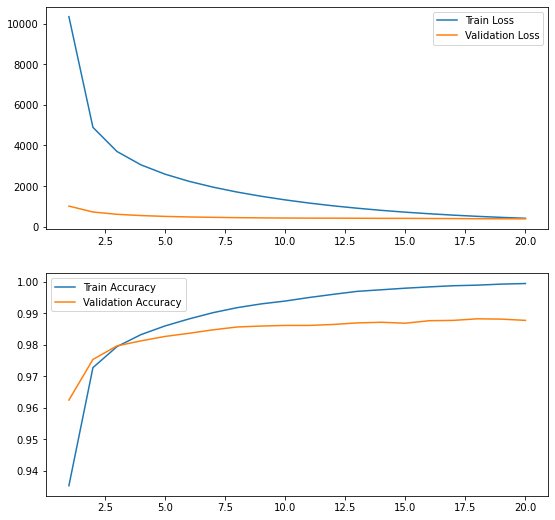

In [10]:
plot_loss_accuracy(trainLostList,valLossList,trainAccList,valAccList,num_epochs)

### For k = 3

In [11]:
k = 3

model3 = MLP(k,"ReLU")
optimizer = torch.optim.Adadelta(model3.parameters(), lr=learn_rate, weight_decay = 0.001)

trainLostList3, trainAccList3, valLossList3, valAccList3  = train_model(model3, k, trainset, testset, loss_fn, optimizer, num_epochs, batch_size, validate_model = True,
                                                                     performance=accuracy, device="cuda:0", lr_scheduler=None)


Training on cuda:0
Epoch 1 completed. Loss - total: 41872.7094 - average: 0.6979; Performance: 0.5071
TESTING - loss 6908.698379993439 - performance 0.5238
Epoch 2 completed. Loss - total: 41198.2832 - average: 0.6866; Performance: 0.5403
TESTING - loss 6770.077466964722 - performance 0.5692
Epoch 3 completed. Loss - total: 39686.0291 - average: 0.6614; Performance: 0.5986
TESTING - loss 6418.362081050873 - performance 0.6297
Epoch 4 completed. Loss - total: 37471.2126 - average: 0.6245; Performance: 0.6469
TESTING - loss 6111.334979534149 - performance 0.6531
Epoch 5 completed. Loss - total: 35672.8548 - average: 0.5945; Performance: 0.6745
TESTING - loss 5796.769976615906 - performance 0.6862
Epoch 6 completed. Loss - total: 34485.2414 - average: 0.5748; Performance: 0.6868
TESTING - loss 5611.566424369812 - performance 0.6956
Epoch 7 completed. Loss - total: 33749.2340 - average: 0.5625; Performance: 0.6962
TESTING - loss 5541.314423084259 - performance 0.7101
Epoch 8 completed. Los

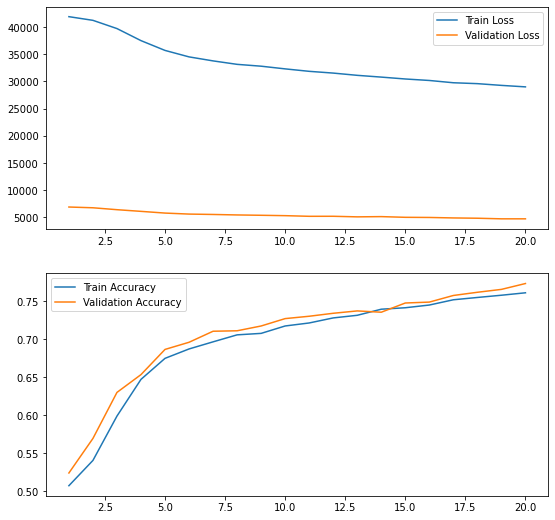

In [12]:
plot_loss_accuracy(trainLostList3,valLossList3,trainAccList3,valAccList3,num_epochs)

In [13]:
k = 3
model4 = MLP(k, "ReLU")
optimizer = torch.optim.SGD(model4.parameters(), lr=learn_rate, weight_decay = 0.001)

trainLostList4, trainAccList4, valLossList4, valAccList4  = train_model(model4, k, trainset, testset, loss_fn, optimizer, num_epochs, batch_size, validate_model = True,
                                                                     performance=accuracy, device="cuda:0", lr_scheduler=None)


Training on cuda:0
Epoch 1 completed. Loss - total: 41824.5120 - average: 0.6971; Performance: 0.5015
TESTING - loss 6941.636443138123 - performance 0.5113
Epoch 2 completed. Loss - total: 40942.9429 - average: 0.6824; Performance: 0.5429
TESTING - loss 6592.044234275818 - performance 0.5959
Epoch 3 completed. Loss - total: 37645.3574 - average: 0.6274; Performance: 0.6348
TESTING - loss 6023.145139217377 - performance 0.6501
Epoch 4 completed. Loss - total: 35257.8154 - average: 0.5876; Performance: 0.6712
TESTING - loss 5676.337659358978 - performance 0.6890
Epoch 5 completed. Loss - total: 34075.0620 - average: 0.5679; Performance: 0.6873
TESTING - loss 5628.784000873566 - performance 0.6912
Epoch 6 completed. Loss - total: 33500.6477 - average: 0.5583; Performance: 0.6963
TESTING - loss 5510.774552822113 - performance 0.7006
Epoch 7 completed. Loss - total: 32977.6787 - average: 0.5496; Performance: 0.7021
TESTING - loss 5376.516103744507 - performance 0.7092
Epoch 8 completed. Los

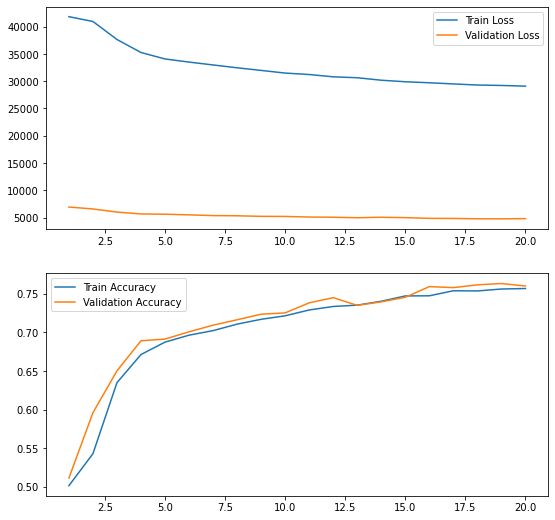

In [14]:
plot_loss_accuracy(trainLostList4,valLossList4,trainAccList4,valAccList4,num_epochs)

Activation: ReLU
Training on cuda:0
Epoch 1 completed. Loss - total: 41881.9538 - average: 0.6980; Performance: 0.5008
TESTING - loss 6925.834834575653 - performance 0.5130
Epoch 2 completed. Loss - total: 41370.8407 - average: 0.6895; Performance: 0.5277
TESTING - loss 6815.342664718628 - performance 0.5673
Epoch 3 completed. Loss - total: 40126.3427 - average: 0.6688; Performance: 0.5864
TESTING - loss 6498.799800872803 - performance 0.6215
Epoch 4 completed. Loss - total: 37950.7235 - average: 0.6325; Performance: 0.6425
TESTING - loss 6142.435073852539 - performance 0.6548
Epoch 5 completed. Loss - total: 36020.9434 - average: 0.6003; Performance: 0.6692
TESTING - loss 5945.8606243133545 - performance 0.6661
Epoch 6 completed. Loss - total: 34765.2705 - average: 0.5794; Performance: 0.6833
TESTING - loss 5656.872868537903 - performance 0.6955
Epoch 7 completed. Loss - total: 34097.9238 - average: 0.5683; Performance: 0.6908
TESTING - loss 5563.028395175934 - performance 0.7025
Epoc

Epoch 20 completed. Loss - total: 41710.1573 - average: 0.6952; Performance: 0.5039
TESTING - loss 6946.92862033844 - performance 0.5016
Activation: ReLU features
Training on cuda:0
Epoch 1 completed. Loss - total: 41934.7834 - average: 0.6989; Performance: 0.4985
TESTING - loss 6976.469039916992 - performance 0.5000
Epoch 2 completed. Loss - total: 41787.9426 - average: 0.6965; Performance: 0.5016
TESTING - loss 6969.339609146118 - performance 0.4939
Epoch 3 completed. Loss - total: 41784.8148 - average: 0.6964; Performance: 0.4955
TESTING - loss 6950.764000415802 - performance 0.5055
Epoch 4 completed. Loss - total: 41704.7870 - average: 0.6951; Performance: 0.5026
TESTING - loss 6939.224481582642 - performance 0.5054
Epoch 5 completed. Loss - total: 41676.0421 - average: 0.6946; Performance: 0.5032
TESTING - loss 6941.941201686859 - performance 0.5024
Epoch 6 completed. Loss - total: 41709.3811 - average: 0.6952; Performance: 0.4983
TESTING - loss 6945.774972438812 - performance 0.4

Epoch 19 completed. Loss - total: 29407.4216 - average: 0.4901; Performance: 0.7534
TESTING - loss 4802.846521139145 - performance 0.7615
Epoch 20 completed. Loss - total: 29098.0721 - average: 0.4850; Performance: 0.7571
TESTING - loss 4879.193127155304 - performance 0.7543


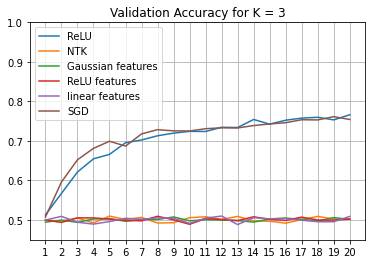

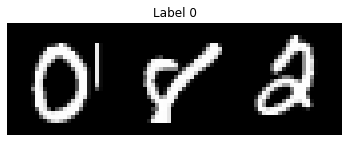

In [15]:
# Add Lazy methods
learn_rate = 0.05
K = 3
num_epochs = 20

fig = plt.figure()
for activation in ["ReLU", "NTK", "Gaussian features", "ReLU features", "linear features", "SGD"]:
    model = MLP(K, activation)

    if "features" in activation:
        # deactivate the first layer
        optimizer = torch.optim.Adadelta(model.layer2.parameters(), lr = learn_rate, weight_decay=0.001)
    elif "NTK" in activation:
        paramsToUpdate = list(model.layer1.parameters()) + list(model.layer2.parameters())
        optimizer = torch.optim.Adadelta(paramsToUpdate, lr = learn_rate, weight_decay=0.001)
    elif "SGD" in activation:
        optimizer = torch.optim.SGD(model.parameters(), lr = learn_rate, weight_decay=0.001)
    else:
        optimizer = torch.optim.Adadelta(model.parameters(), lr = learn_rate, weight_decay=0.001)

    print("Activation:",activation)

    trainLostList, trainAccList, valLossList, valAccList  = train_model(model, K, trainset, testset, loss_fn, optimizer, num_epochs, 
                                                                        batch_size, validate_model = True, performance=accuracy, 
                                                                        device="cuda:0", lr_scheduler=None)

    plotValAccuracy(valAccList,num_epochs, activation, K)

fig.savefig(str(K) + "valAccuracy.png")
plt.show()
dataset = MNISTParity(trainset, K, 128)
dataset.plotRandomData()

# just need to find good lr and weight_decay values for lazy methods to have more similar plots to paper
